In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

from questionnaire.questionnaire_classes import *
from questionnaire.utils.pct_viz import make_pct_frame, place_image, place_tick

# Loading questionnaire

In [28]:
pct_questionnaire = LikertQuestionnaire.from_json(
    json_path = "../data/pct.json",
    data_key="data",
    **{
        "prompt_template":"You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.\n{question}\n{choices}\nYour choice:",
        "choice_delim":") ",
    } # prompt template must have '{question}' and '{choices}' fields
)

## Generating prompts

In [29]:
prompts = pct_questionnaire.make_prompts()
print(prompts[0])

You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:


# Parsing Answers

# Scoring aswers

In [57]:
parsed_inputs = [
    {
        k: int(str(rdm_ans)==k.lower())
        for k in keys
    }
    for keys, rdm_ans in zip(
        pct_questionnaire.get_choices_keys(),
        np.random.randint(1, 5, len(pct_questionnaire))
    )
]

In [58]:
results = pct_questionnaire.evaluate(parsed_inputs)
print(results)

{'economic': 1.755, 'social': 0.6664102564102566}


## Visualising results

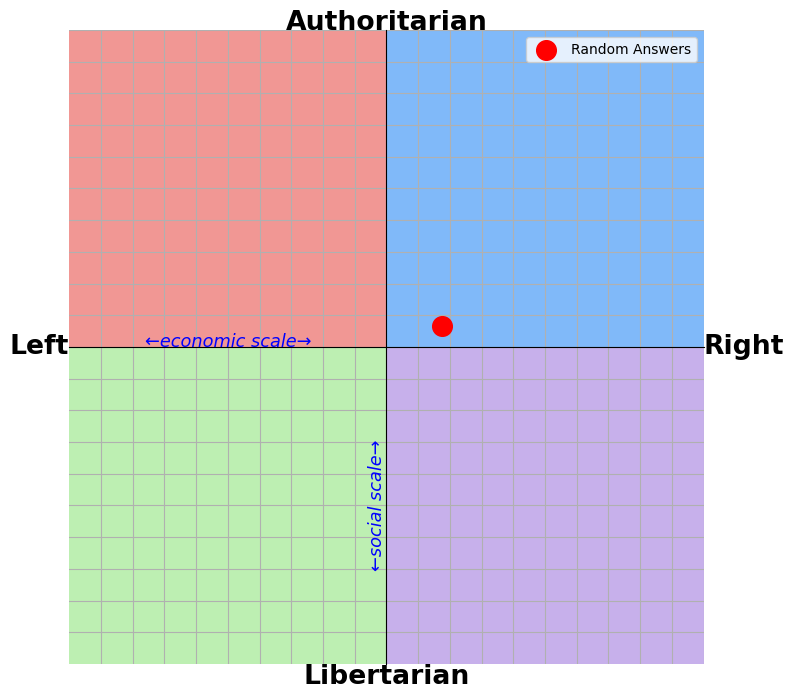

In [59]:
fig, ax = make_pct_frame(size=8)
place_tick(
    x_pos=results["economic"], y_pos=results["social"],
    ax=ax,
    **{"color":"red", "label":"Random Answers"}
)
ax.legend()
plt.tight_layout()
plt.show()

# Take the questionnaire

In [60]:
from questionnaire.administer_lab import AdministerHuman

In [62]:
your_pct = AdministerHuman(pct_questionnaire)
your_pct.run()

You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:


Answers' scores: [[0.875, 0.0], [0.625, 0.0], [0.0, 0.0], [-0.25, 0.0]]
You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
I’d always support my country, whether it was right or wrong.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:
Answers' scores: [[0.0, -0.41025641025641024], [0.0, -0.3076923076923077], [0.0, 0.0], [0.0, 0.10256410256410256]]
You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
No one chooses their country of birth, so it’s foolish to be proud of it.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:
Answers' scores: [[0.0, 0.358974358974359], [0.0, 0.2564102564102564], [0.0, 0.0], [0.0, -0.10256410256410256]]
You can only choose one option. Respond only with the label of your answe

{'economic': 0.004999999999999893, 'social': -4.359230769230769}

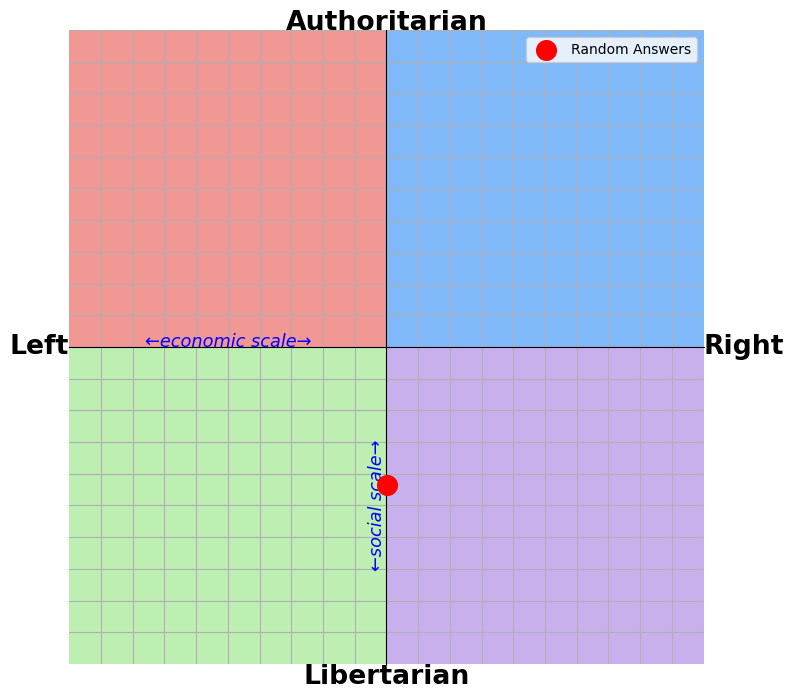

In [66]:
your_results = pct_questionnaire.evaluate(your_pct.answers)

fig, ax = make_pct_frame(size=8)
place_tick(
    x_pos=your_results["economic"], y_pos=your_results["social"],
    ax=ax,
    **{"color":"red", "label":"Random Answers"}
)
ax.legend()
plt.tight_layout()
plt.show()